### 1. Load data from csv file

In [0]:
import numpy as np

TRAIN_DATA_PATH = './data_train.csv'
TEST_DATA_PATH = './data_test.csv'

# load train/test data
train_data = np.genfromtxt(TRAIN_DATA_PATH, delimiter=',', dtype=np.str)
train_data = np.char.strip(train_data, '"').astype(np.float64)

test_data = np.genfromtxt(TEST_DATA_PATH, delimiter=',', dtype=np.str)
test_data = np.char.strip(test_data, '"').astype(np.float64)

# seperate feature and answer
x_train = train_data[:, 0:-1]
y_train = train_data[:, -1].reshape(-1, 1)

x_test = test_data[:, 0:-1]
y_test = test_data[:, -1].reshape(-1, 1)

### 2. Define functions for linear regression



In [0]:
def linear(theta, x):
  m = len(x)
  temp_x = np.concatenate((np.ones((m, 1)), x), axis=1)
  return np.matmul(temp_x, theta.T)

def objective(y_hat, y):
  m = len(y)
  return (1 / (2 * m)) * np.sum((y_hat - y) ** 2, axis=0)

def gradient(x, y_hat, y):
  m = len(x)
  temp_x = np.concatenate((np.ones((m, 1)), x), axis=1)
  return (1 / m) * np.matmul((y_hat - y).T, temp_x)

### 3. Learning with the gradient descent algorithm


In [0]:
# initialize model parameters and learning rate
feature_cnt = x_train.shape[1]
theta = np.ones((1, feature_cnt + 1))

lr = 0.00002
epoch_count = 10000

history = {
    'theta': np.zeros((epoch_count, theta.shape[1])),
    'train_err': np.zeros(epoch_count),
    'test_err': np.zeros(epoch_count)
}

for epoch in range(epoch_count):
  # calculate training error
  y_hat_train = linear(theta, x_train)
  train_err = objective(y_hat_train, y_train)

  # calculate testing error
  y_hat_test = linear(theta, x_test)
  test_err = objective(y_hat_test, y_test)

  # logging history
  history['theta'][epoch] = np.squeeze(theta)
  history['train_err'][epoch] = train_err
  history['test_err'][epoch] = test_err

  # gradient descent using the training dataset
  grad_theta = gradient(x_train, y_hat_train, y_train)
  theta -= lr * grad_theta

### 4. Plot the results


4-1. Estimated parameters

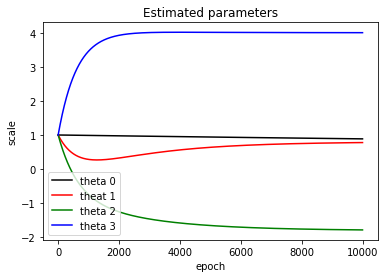

In [246]:
import matplotlib.pyplot as plt

epoch_tick = np.arange(epoch_count)

plt.title('Estimated parameters')
plt.plot(epoch_tick, history['theta'][:, 0], 'k-')
plt.plot(epoch_tick, history['theta'][:, 1], 'r-')
plt.plot(epoch_tick, history['theta'][:, 2], 'g-')
plt.plot(epoch_tick, history['theta'][:, 3], 'b-')
plt.legend(['theta 0', 'theat 1', 'theta 2', 'theta 3'])
plt.xlabel('epoch')
plt.ylabel('scale')
plt.show()

4-2. Training error

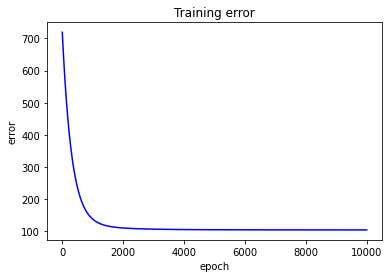

In [247]:
plt.title('Training error')
plt.plot(epoch_tick, history['train_err'], 'b-')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

4-3. Testing error

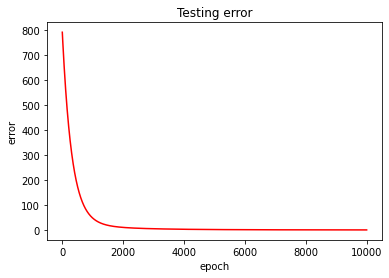

In [248]:
plt.title('Testing error')
plt.plot(epoch_tick, history['test_err'], 'r-')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()